<a href="https://colab.research.google.com/github/Polo9422/Data/blob/main/DataScience_III.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Presentación del proyecto**

**Abstracto con Motivación y Audiencia**

  **Contenido**

---

Google Play, anteriormente Android Market, es un servicio de distribución digital operado y desarrollado por Google. Funciona como la tienda de aplicaciones oficial para dispositivos certificados que funcionan con el sistema operativo Android, lo que permite a los usuarios explorar y descargar aplicaciones desarrolladas con el kit de desarrollo de software (SDK) de Android y publicadas a través de Google. Ha superado los 82 mil millones de descargas de aplicaciones y más de 3,5 millones de aplicaciones publicadas, lo que la convierte en la tienda de aplicaciones más grande del mundo.

Los datos contienen más de 12.000 reseñas de distintas aplicaciones de la tienda de aplicaciones realizadas por usuarios reales. Los datos también contienen la calificación que otorgaron para que se puedan clasificar en reseñas positivas o negativas. Para este análisis solo se trabajo sobre 11967 datos, y solo dos columnas ('userName' y 'content').

**Motivación y Objetivo**

---

Este es un muy buen lugar para comenzar a aprender sobre el análisis de sentimientos. El objetivo es poder analizar y clasificar las reseñas para determinar si son positivas o negativas.

**Audiencia**

---

Esta dirigido a todo aquel que quiera comenzar a incurcionar en el NLP, a todo principiante que esta dando sus primeros pasos como yo.

**Contexto Comercial y Analítico**

---
El análisis se centrará en evaluar el sentimiento de las reseñas de usuarios de aplicaciones móviles

**Preguntas/Hipótesis a Resolver**

---


*   ¿Cuál es el sentimiento general (positivo, negativo, neutral) de las reseñas?
*   ¿Qué temas o aspectos de la app son mencionados con mayor frecuencia en comentarios positivos y negativos?

Hipótesis: ¿Podría ser que los usuarios opten por dar reseñas cuando el producto es malo o al revés?





# DATOS

In [2]:
!pip install opendatasets
import opendatasets as od

In [3]:
dataset_url = 'https://www.kaggle.com/datasets/prakharrathi25/google-play-store-reviews'
od.download(dataset_url)

#Your Kaggle username: juanpolo
#Your Kaggle Key:ea9c77f5f27ddfa60985c61a66d9f013

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: juanpolo
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/prakharrathi25/google-play-store-reviews


100%|██████████| 2.55M/2.55M [00:00<00:00, 121MB/s]

In [4]:
import os
os.chdir('./google-play-store-reviews')
os.listdir()

['reviews.csv']

In [5]:
import pandas as pd
archivo=pd.read_csv('reviews.csv')
df=pd.DataFrame(archivo)
df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,sortOrder,appId
0,gp:AOqpTOEhZuqSqqWnaKRgv-9ABYdajFUB0WugPGh-SG-...,Eric Tie,https://play-lh.googleusercontent.com/a-/AOh14...,I cannot open the app anymore,1,0,5.4.0.6,2020-10-27 21:24:41,NaN,NaN,newest,com.anydo
1,gp:AOqpTOH0WP4IQKBZ2LrdNmFy_YmpPCVrV3diEU9KGm3...,john alpha,https://play-lh.googleusercontent.com/a-/AOh14...,I have been begging for a refund from this app...,1,0,NaN,2020-10-27 14:03:28,"Please note that from checking our records, yo...",2020-10-27 15:05:52,newest,com.anydo
2,gp:AOqpTOEMCkJB8Iq1p-r9dPwnSYadA5BkPWTf32Z1azu...,Sudhakar .S,https://play-lh.googleusercontent.com/a-/AOh14...,Very costly for the premium version (approx In...,1,0,NaN,2020-10-27 08:18:40,NaN,NaN,newest,com.anydo
3,gp:AOqpTOGFrUWuKGycpje8kszj3uwHN6tU_fd4gLVFy9z...,SKGflorida@bellsouth.net DAVID S,https://play-lh.googleusercontent.com/-75aK0WF...,"Used to keep me organized, but all the 2020 UP...",1,0,NaN,2020-10-26 13:28:07,What do you find troublesome about the update?...,2020-10-26 14:58:29,newest,com.anydo
4,gp:AOqpTOHls7DW8wmDFzTkHwxuqFkdNQtKHmO6Pt9jhZE...,Louann Stoker,https://play-lh.googleusercontent.com/-pBcY_Z-...,Dan Birthday Oct 28,1,0,5.6.0.7,2020-10-26 06:10:50,NaN,NaN,newest,com.anydo


In [6]:
df.shape

(12495, 12)

In [7]:
valores_unicos=df['userName'].nunique()
print(valores_unicos)


11967


In [8]:
df_reviews=df[['userName','content']]
df_reviews.drop_duplicates(inplace=True)
df_reviews.head()

<ipython-input-8-6b2c508c781e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reviews.drop_duplicates(inplace=True)


,userName,content
0,Eric Tie,I cannot open the app anymore
1,john alpha,I have been begging for a refund from this app...
2,Sudhakar .S,Very costly for the premium version (approx In...
3,SKGflorida@bellsouth.net DAVID S,"Used to keep me organized, but all the 2020 UP..."
4,Louann Stoker,Dan Birthday Oct 28


# EDA

In [9]:
import nltk
import string
import matplotlib.pyplot as plt
from collections import Counter


# Función para preprocesar una oración
def preprocess(sentence):
    # Convertir a minúsculas
    sentence = sentence.lower()

    # Eliminar signos de puntuación
    translator = str.maketrans('', '', string.punctuation)
    sentence = sentence.translate(translator)

    # Tokenizar la oración (dividir en palabras)
    words = sentence.split()

    return words

# Aplicar la función preprocess a cada oración en el corpus
cleaned_corpus = [preprocess(sentence) for sentence in df_reviews['content']]


In [25]:
import numpy as np
nltk.download('cess_esp')
corpus = nltk.corpus.cess_esp.sents()

def describe_corpus(corpus):
    # Número de oraciones
    num_sentences = len(corpus)

    # Número total de palabras
    num_words = sum(len(sentence) for sentence in corpus)

    # Longitud de las oraciones
    sentence_lengths = [len(sentence) for sentence in corpus]
    avg_sentence_length = np.mean(sentence_lengths)
    std_sentence_length = np.std(sentence_lengths)
    max_sentence_length = np.max(sentence_lengths)
    min_sentence_length = np.min(sentence_lengths)

    # Todas las palabras
    all_words = [word for sentence in corpus for word in sentence]
    unique_words = set(all_words)
    num_unique_words = len(unique_words)

    # Longitud de las palabras
    word_lengths = [len(word) for word in all_words]
    avg_word_length = np.mean(word_lengths)
    std_word_length = np.std(word_lengths)
    max_word_length = np.max(word_lengths)
    min_word_length = np.min(word_lengths)

    # Frecuencia de palabras
    word_freq = Counter(all_words)
    most_common_words = word_freq.most_common(10)

    # Descripción
    description = {
        'Número de oraciones': num_sentences,
        'Número total de palabras': num_words,
        'Longitud promedio de oraciones': avg_sentence_length,
        'Desviación estándar de la longitud de las oraciones': std_sentence_length,
        'Longitud máxima de las oraciones': max_sentence_length,
        'Longitud mínima de las oraciones': min_sentence_length,
        'Número de palabras únicas': num_unique_words,
        'Longitud promedio de las palabras': avg_word_length,
        'Desviación estándar de la longitud de las palabras': std_word_length,
        'Longitud máxima de las palabras': max_word_length,
        'Longitud mínima de las palabras': min_word_length,
        'Palabras más comunes': most_common_words
    }

    return description

# Descripción del corpus
corpus_description = describe_corpus(corpus)
for key, value in corpus_description.items():
    print(f"{key}: {value}")

[nltk_data] Downloading package cess_esp to /root/nltk_data...
[nltk_data]   Package cess_esp is already up-to-date!


Número de oraciones: 6030
Número total de palabras: 192686
Longitud promedio de oraciones: 31.954560530679935
Desviación estándar de la longitud de las oraciones: 17.125957864220783
Longitud máxima de las oraciones: 149
Longitud mínima de las oraciones: 1
Número de palabras únicas: 25464
Longitud promedio de las palabras: 4.731075428417218
Desviación estándar de la longitud de las palabras: 3.796360641855268
Longitud máxima de las palabras: 78
Longitud mínima de las palabras: 1
Palabras más comunes: [(',', 11420), ('de', 10234), ('la', 6412), ('.', 5866), ('que', 5552), ('el', 5199), ('en', 4340), ('y', 4235), ('*0*', 3883), ('"', 3038)]


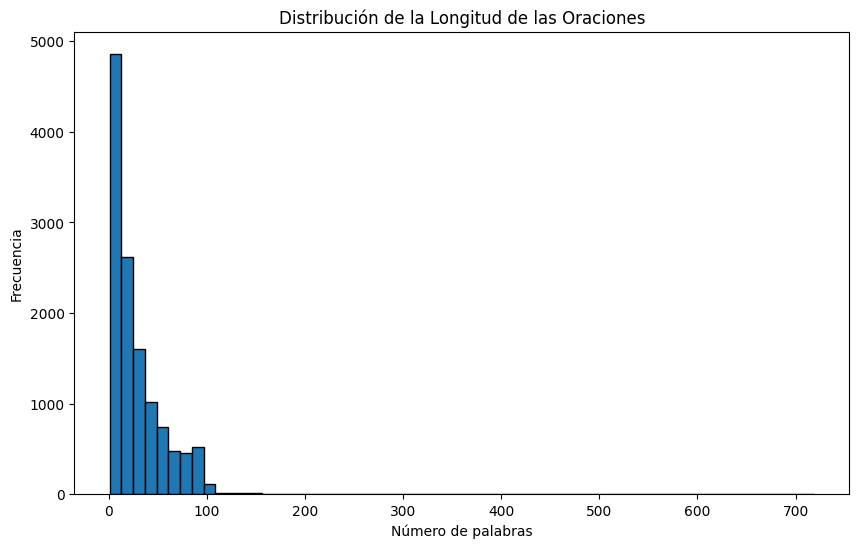

In [12]:
# Longitud de las oraciones
sentence_lengths = [len(sentence) for sentence in cleaned_corpus]

plt.figure(figsize=(10, 6))
plt.hist(sentence_lengths, bins=60, edgecolor='black')
plt.title('Distribución de la Longitud de las Oraciones')
plt.xlabel('Número de palabras')
plt.ylabel('Frecuencia')
plt.show()

Las 20 palabras más comunes: [('the', 13337), ('to', 11980), ('i', 11300), ('it', 8361), ('and', 7577), ('app', 7542), ('a', 7340), ('for', 5077), ('is', 5010), ('this', 4611), ('but', 3796), ('my', 3793), ('of', 3753), ('you', 3143), ('in', 2911), ('that', 2866), ('not', 2845), ('have', 2637), ('on', 2486), ('me', 2213)]


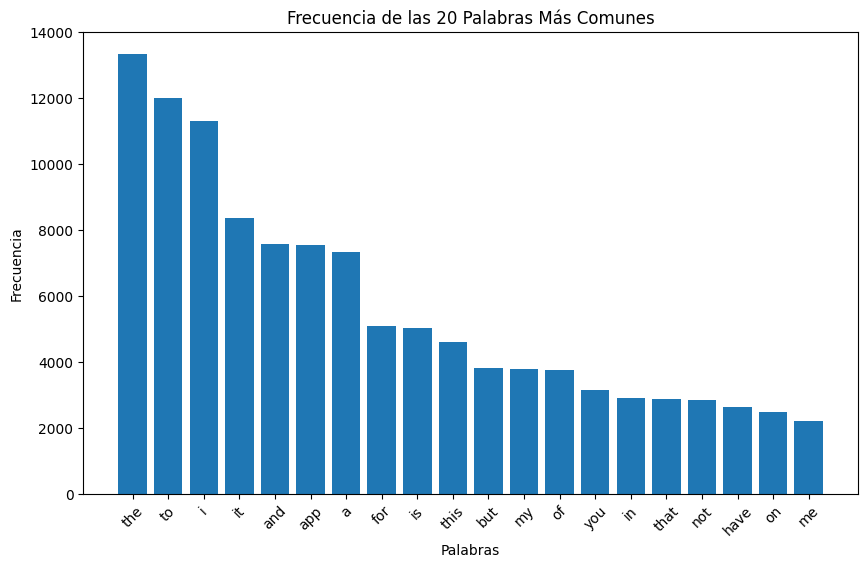

In [13]:
# Contar la frecuencia de las palabras
all_words = [word for sentence in cleaned_corpus for word in sentence]
word_freq = Counter(all_words)

# Mostrar las palabras más comunes
most_common_words = word_freq.most_common(20)
print("Las 20 palabras más comunes:", most_common_words)

# Gráfico de las palabras más comunes
words, counts = zip(*most_common_words)
plt.figure(figsize=(10, 6))
plt.bar(words, counts)
plt.title('Frecuencia de las 20 Palabras Más Comunes')
plt.xlabel('Palabras')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()

In [14]:
from nltk.corpus import stopwords
nltk.download('stopwords')

def preprocess(sentence):
    sentence = sentence.lower()

    translator = str.maketrans('', '', string.punctuation)
    sentence = sentence.translate(translator)
    words = sentence.split()

    # Eliminar stop words
    sentence = [word for word in words if word not in stop_words]

    return sentence

# Descargar stop words
stop_words = set(stopwords.words('english'))

# Aplicar la función preprocess a cada oración en el corpus
cleaned_corpus = [preprocess(sentence) for sentence in df_reviews['content']]


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Las 20 palabras más comunes: [('app', 7542), ('like', 1721), ('good', 1719), ('use', 1604), ('time', 1525), ('tasks', 1487), ('great', 1483), ('would', 1328), ('really', 1208), ('calendar', 1187), ('task', 1128), ('love', 1120), ('one', 1099), ('dont', 1052), ('version', 996), ('day', 993), ('cant', 971), ('work', 954), ('get', 898), ('list', 885)]


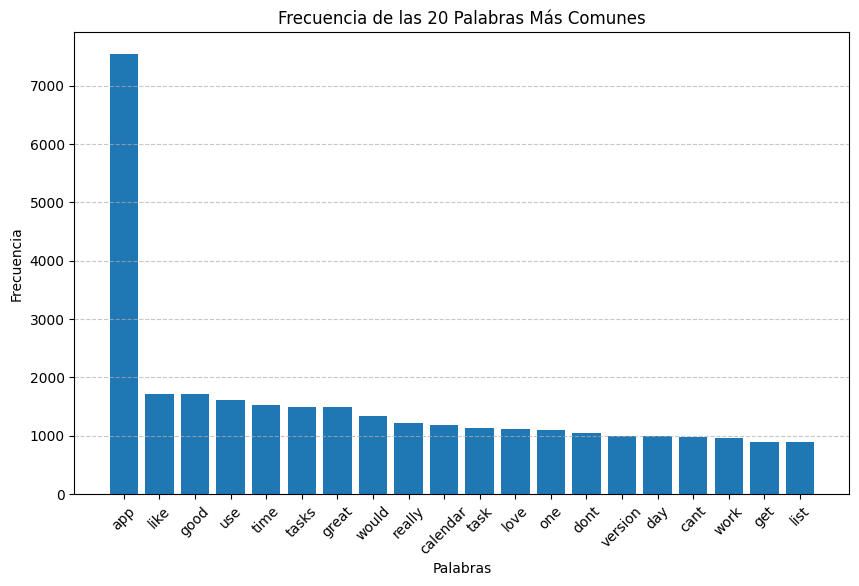

In [15]:
from collections import Counter
import matplotlib.pyplot as plt

# Aplanar la lista de listas
all_words = [word for sentence in cleaned_corpus for word in sentence]

# Contar la frecuencia de las palabras
word_freq = Counter(all_words)

# Mostrar las 20 palabras más comunes
most_common_words = word_freq.most_common(20)
print("Las 20 palabras más comunes:", most_common_words)

# Gráfico de las palabras más comunes
words, counts = zip(*most_common_words)
plt.figure(figsize=(10, 6))
plt.bar(words, counts)
plt.title('Frecuencia de las 20 Palabras Más Comunes')
plt.xlabel('Palabras')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


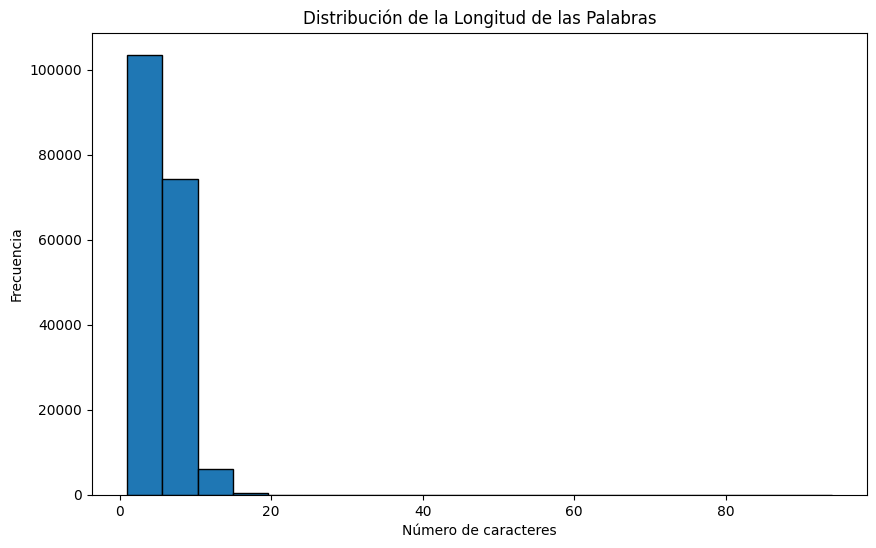

In [16]:
word_lengths = [len(word) for word in all_words]

plt.figure(figsize=(10, 6))
plt.hist(word_lengths, bins=20, edgecolor='black')
plt.title('Distribución de la Longitud de las Palabras')
plt.xlabel('Número de caracteres')
plt.ylabel('Frecuencia')
plt.show()

# Pos Taggins

In [17]:
!python -m spacy download en_core_web_sm
import spacy

# Cargar el modelo de SpaCy
nlp = spacy.load('en_core_web_sm')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 75.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


Las 10 partes del discurso más comunes: [('NOUN', 70187), ('VERB', 41985), ('ADJ', 27227), ('ADV', 13705), ('PROPN', 11424), ('AUX', 8509), ('PART', 4232), ('NUM', 4099), ('PRON', 3932), ('ADP', 2394)]


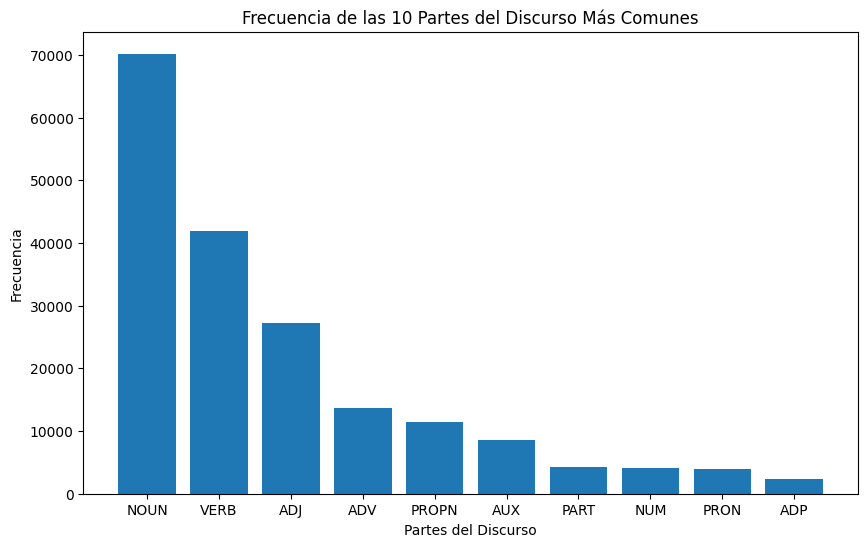

In [18]:

def pos_tagging(sentence):
    doc = nlp(" ".join(sentence))
    return [(token.text, token.pos_) for token in doc]

# Aplicar POS tagging
pos_tagged_corpus = [pos_tagging(sentence) for sentence in cleaned_corpus]

# Contar la frecuencia de las partes del discurso
pos_counts = Counter([pos for sentence in pos_tagged_corpus for _, pos in sentence])

# Mostrar las partes del discurso más comunes
most_common_pos = pos_counts.most_common(10)
print("Las 10 partes del discurso más comunes:", most_common_pos)

# Gráfico
pos, counts = zip(*most_common_pos)
plt.figure(figsize=(10, 6))
plt.bar(pos, counts)
plt.title('Frecuencia de las 10 Partes del Discurso Más Comunes')
plt.xlabel('Partes del Discurso')
plt.ylabel('Frecuencia')
plt.show()

# N-**gramas**

In [19]:
from nltk.util import ngrams

# Función para generar n-gramas
def generate_ngrams(corpus, n):
    ngrams_list = []
    for sentence in corpus:
        ngrams_list.extend(list(ngrams(sentence, n)))
    return ngrams_list

# Generar bigramas y trigramas
bigrams = generate_ngrams(cleaned_corpus, 2)
trigrams = generate_ngrams(cleaned_corpus, 3)

# Contar la frecuencia de los n-gramas
bigram_freq = Counter(bigrams)
trigram_freq = Counter(trigrams)

# Mostrar los bigramas y trigramas más comunes
most_common_bigrams = bigram_freq.most_common(10)
most_common_trigrams = trigram_freq.most_common(10)

print("Los 10 bigramas más comunes:", most_common_bigrams)
print("Los 10 trigramas más comunes:", most_common_trigrams)

Los 10 bigramas más comunes: [(('great', 'app'), 502), (('good', 'app'), 371), (('love', 'app'), 348), (('easy', 'use'), 321), (('pro', 'version'), 257), (('google', 'calendar'), 251), (('free', 'version'), 243), (('like', 'app'), 187), (('doesnt', 'work'), 178), (('5', 'stars'), 178)]
Los 10 trigramas más comunes: [(('really', 'like', 'app'), 50), (('give', '5', 'stars'), 44), (('app', 'easy', 'use'), 34), (('buy', 'pro', 'version'), 34), (('full', 'screen', 'ads'), 34), (('would', 'like', 'see'), 29), (('todo', 'list', 'app'), 28), (('sync', 'google', 'calendar'), 26), (('really', 'good', 'app'), 26), (('used', 'love', 'app'), 25)]


In [26]:
# Diversidad léxica
lexical_diversity = num_unique_words / num_words
print(f"Diversidad léxica: {lexical_diversity:.4f}")

#Indica qué tan variado es el uso de palabras en un conjunto de texto, lo que puede proporcionar información sobre la riqueza lingüística y el estilo de escritura.
#Un TTR (Tipo-Token Ratio) más cercano a 1 indica mayor diversidad léxica (más palabras únicas), mientras que un TTR más cercano a 0 indica menor diversidad.
#Sensibilidad al Tamaño del Texto, un TTR puede ser problemático para textos muy cortos, ya que tenderá a ser más alto. Por otro lado, en textos largos, el TTR suele disminuir.

Diversidad léxica: 929.8667
